In [117]:
!rm -rf /content/*

In [87]:
pip install vtk

In [118]:
from google.colab import files

# This will prompt you to select a file. After you select it, it will be uploaded to the Colab environment.
uploaded = files.upload()

Saving 2p_im_magic_use_het-00000.vtp to 2p_im_magic_use_het-00000.vtp
Saving 2p_im_magic_use_het-00001.vtp to 2p_im_magic_use_het-00001.vtp
Saving 2p_im_magic_use_het-00002.vtp to 2p_im_magic_use_het-00002.vtp
Saving 2p_im_magic_use_het-00003.vtp to 2p_im_magic_use_het-00003.vtp
Saving 2p_im_magic_use_het-00004.vtp to 2p_im_magic_use_het-00004.vtp
Saving 2p_im_magic_use_het-00005.vtp to 2p_im_magic_use_het-00005.vtp
Saving 2p_im_magic_use_het-00006.vtp to 2p_im_magic_use_het-00006.vtp
Saving 2p_im_magic_use_het-00007.vtp to 2p_im_magic_use_het-00007.vtp
Saving 2p_im_magic_use_het-00008.vtp to 2p_im_magic_use_het-00008.vtp
Saving 2p_im_magic_use_het-00009.vtp to 2p_im_magic_use_het-00009.vtp
Saving 2p_im_magic_use_het-00010.vtp to 2p_im_magic_use_het-00010.vtp
Saving 2p_im_magic_use_het-00011.vtp to 2p_im_magic_use_het-00011.vtp
Saving 2p_im_magic_use_het-00012.vtp to 2p_im_magic_use_het-00012.vtp
Saving 2p_im_magic_use_het-00013.vtp to 2p_im_magic_use_het-00013.vtp
Saving 2p_im_magic_u

Number of VTP files detected: 59


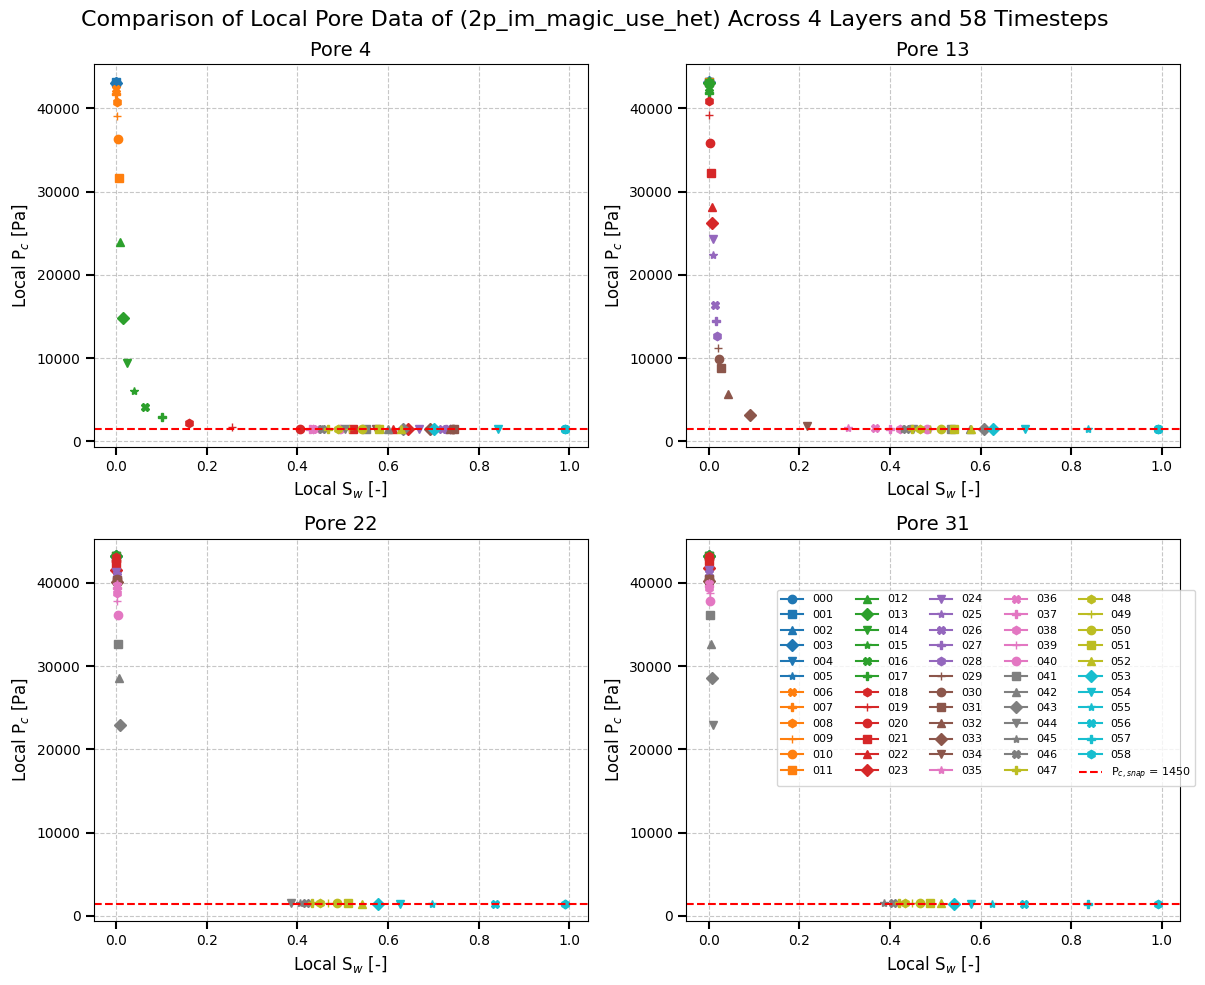

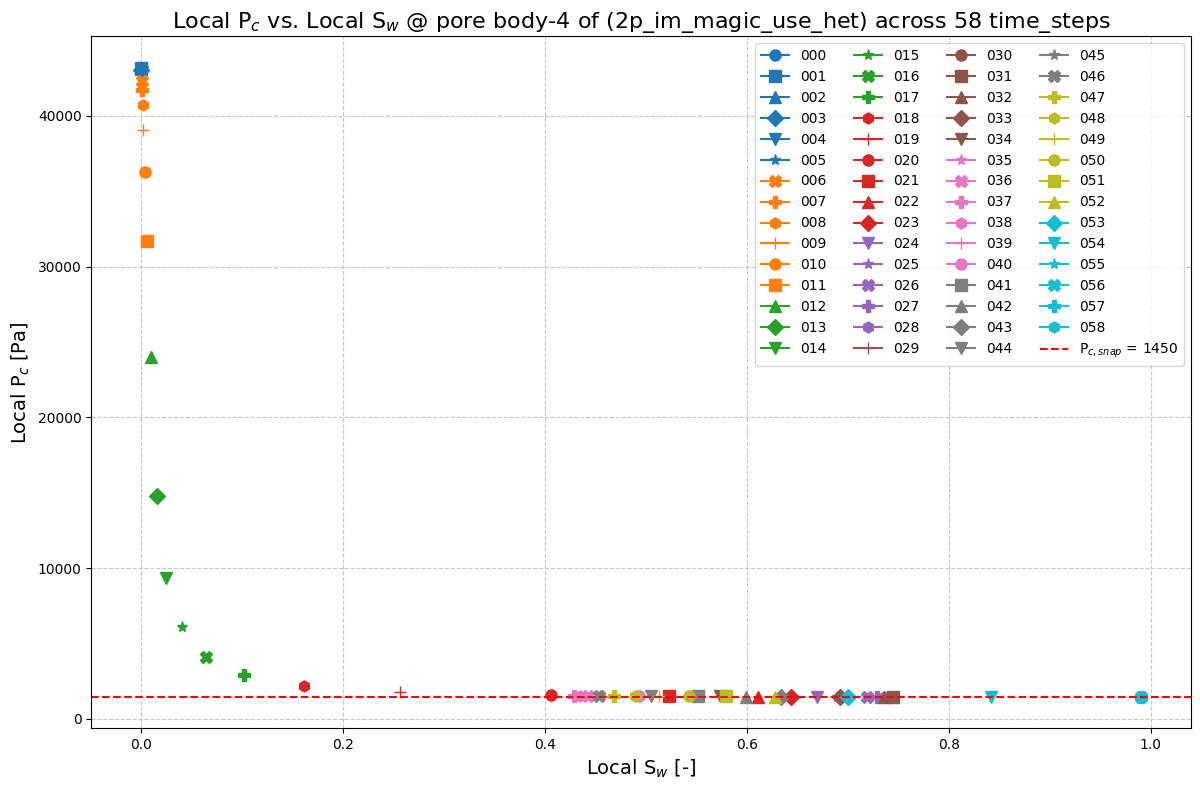

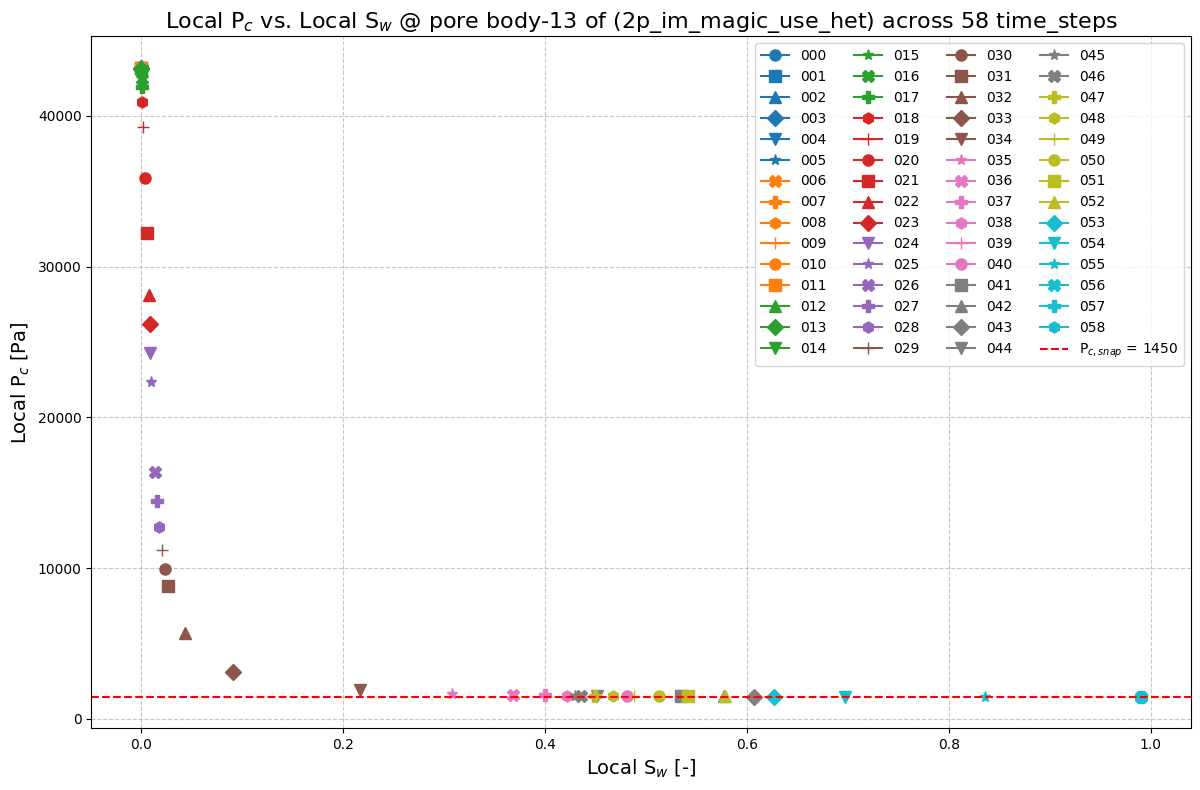

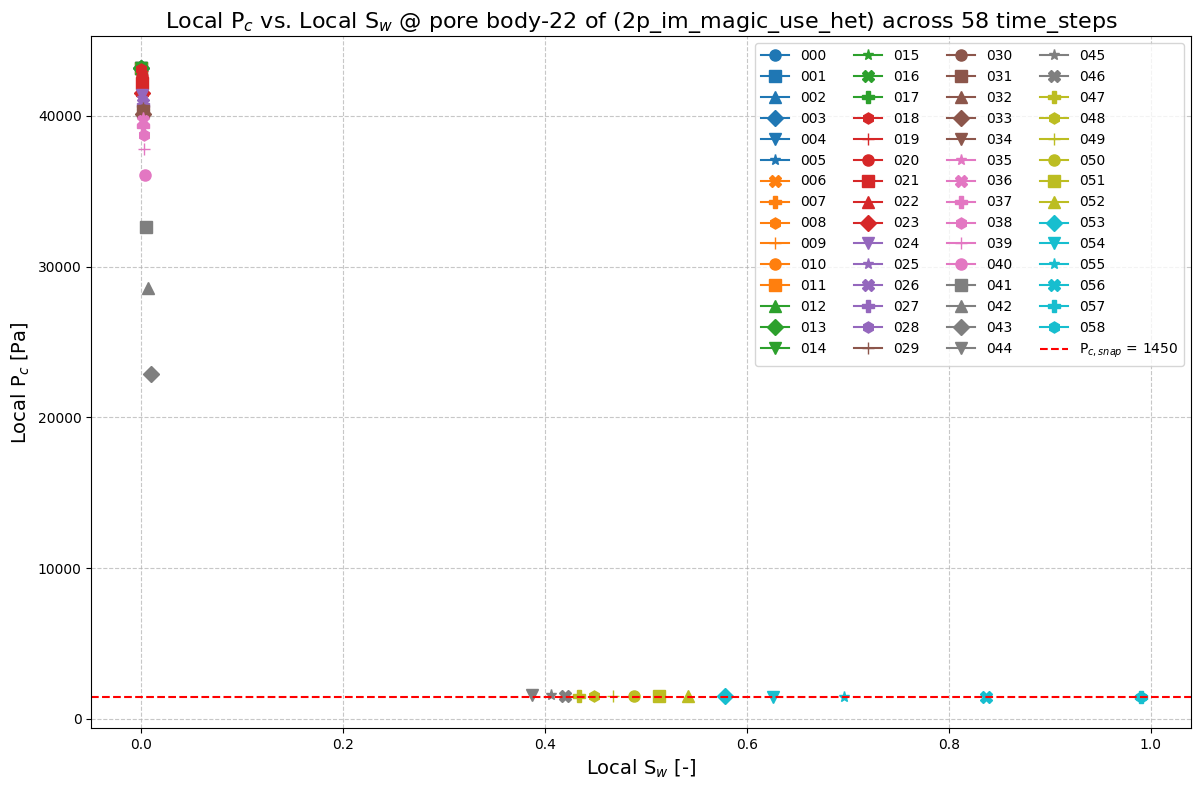

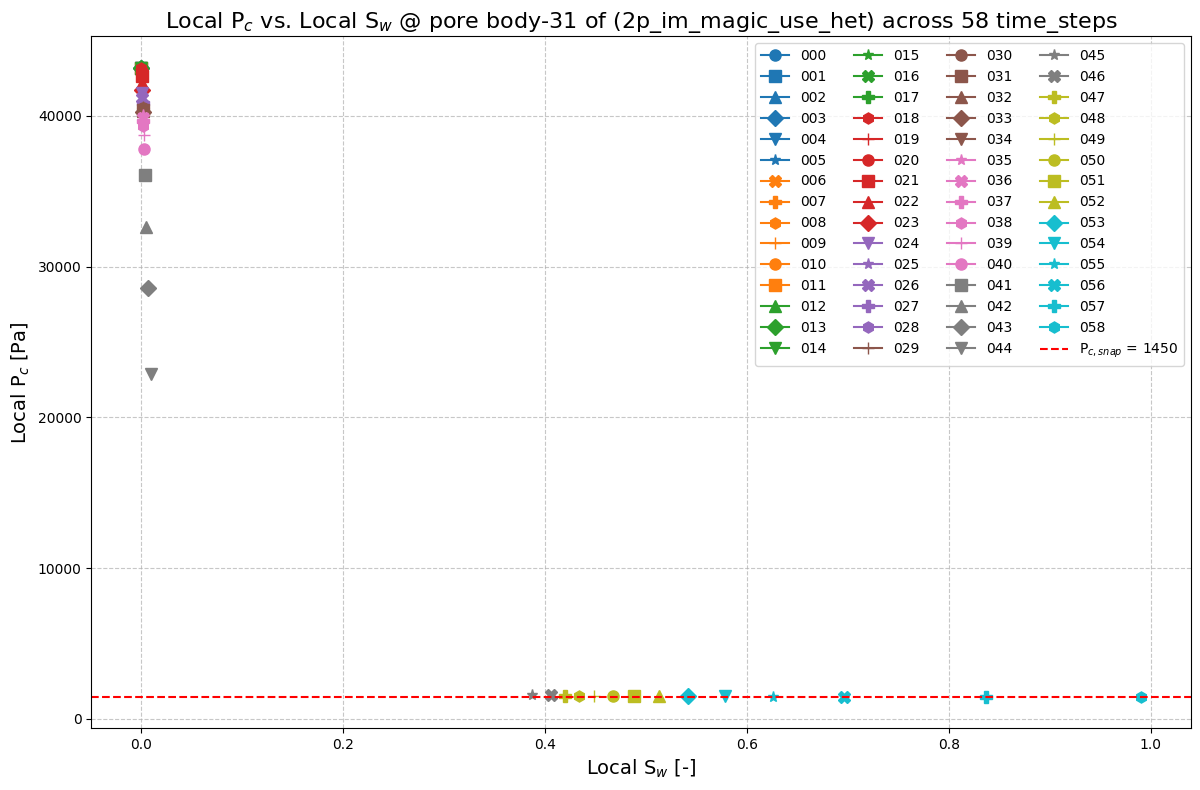

In [119]:
import numpy as np
import vtk
import matplotlib.pyplot as plt
import os

# Specify your file path
file_directory = "/content"

# Function to extract data from VTP file
def extract_data_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract PC (assuming it's stored as point data)
        pc_array = np.array(polydata.GetPointData().GetArray("pc"))

        # Extract S_liq (assuming it's stored as point data)
        s_liq_array = np.array(polydata.GetPointData().GetArray("S_liq"))

        # Extract pcSnapoff data as cell data
        pc_snapoff_data = polydata.GetCellData().GetArray("pcSnapoff")
        if pc_snapoff_data is None:
            raise ValueError("pcSnapoff data not found in the VTP file.")

        # Extract pcSnapoff value (taking only the first value)
        pc_snapoff_value = pc_snapoff_data.GetValue(0)

        return pc_array, s_liq_array, pc_snapoff_value
    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Specify your file name
file_name = os.path.basename(file_paths[0])[:-10]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Define markers and colors for each file
markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P', 'h', '+']  # Add more markers if needed
colors = plt.cm.tab10(np.linspace(0, 1, num_vtp_files))

# Pore indices to plot
pore_indices = [4, 13, 22, 31]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot PC against S_liq for each VTP file in subplots
for idx, pore_index in enumerate(pore_indices):
    ax = axs[idx // 2, idx % 2]  # Get subplot axis
    ax.set_xlabel('Local S$_w$ [-]', fontsize=12)
    ax.set_ylabel('Local P$_c$ [Pa]', fontsize=12)
    ax.set_title(f'Pore {pore_index}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    ax.tick_params(axis='both', which='minor', direction='out', length=3, width=1)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    pc_snapoff_values = []  # Store pcSnapoff values for each file
    for i, file_path in enumerate(file_paths):
        pc_array, s_liq_array, pc_snapoff_value = extract_data_from_vtp(file_path)
        if pc_array is not None:
            file_label = os.path.basename(file_path)[-7:-4]
            marker = markers[i % len(markers)]
            color = colors[i]

            ax.plot(s_liq_array[pore_index], pc_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)
            pc_snapoff_values.append(pc_snapoff_value)  # Collect pcSnapoff values

    # Add pcSnapoff value to the legend (only once)
    unique_pc_snapoff = list(set(pc_snapoff_values))
    ax.axhline(y=int(unique_pc_snapoff[0]), color='r', linestyle='--', label=f'P$_{{c,snap}}$ = {int(unique_pc_snapoff[0])}')

# Add legend to the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=8, loc='upper right', ncol=5, bbox_to_anchor=(1, 0.4), borderaxespad=0.)

# Add overall title to the plot
fig.suptitle(f'Comparison of Local Pore Data of ({file_name}) Across 4 Layers and {num_vtp_files-1} Timesteps', fontsize=16)

# Adjust layout
plt.tight_layout()

# Save subplots as .png file with file names
subplots_filename = f"subplots of ({file_name}) for pc vs. sw.png"
plt.savefig(subplots_filename, bbox_inches='tight')
plt.show()

# Save individual plots for each pore index with file names
for pore_index in pore_indices:
    # Plot PC against S_liq for each VTP file
    plt.figure(figsize=(12, 8))

    plt.xlabel('Local S$_w$ [-]', fontsize=14)
    plt.ylabel('Local P$_c$ [Pa]', fontsize=14)
    plt.title(f'Local P$_c$ vs. Local S$_w$ @ pore body-{pore_index} of ({file_name}) across {num_vtp_files-1} time_steps', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    pc_snapoff_values = []  # Store pcSnapoff values for each file
    for i, file_path in enumerate(file_paths):
        pc_array, s_liq_array, pc_snapoff_value = extract_data_from_vtp(file_path)
        if pc_array is not None:
            file_label = os.path.basename(file_path)[-7:-4]  # Extract the file name without extension
            marker = markers[i % len(markers)]  # Cycle through markers
            color = colors[i]  # Get color from the predefined list
            plt.plot(s_liq_array[pore_index], pc_array[pore_index], color=color, marker=marker, markersize=8, label=file_label)
            pc_snapoff_values.append(pc_snapoff_value)  # Collect pcSnapoff values

    # Add pcSnapoff value to the legend (only once)
    unique_pc_snapoff = list(set(pc_snapoff_values))
    plt.axhline(y=unique_pc_snapoff[0], color='r', linestyle='--', label=f'P$_{{c,snap}}$ = {int(unique_pc_snapoff[0])}')

    # Adjust ncol to control the number of columns in the legend
    plt.legend(fontsize=10, loc='upper right', ncol=4)

    # Save plot as .png file with file names
    plot_filename = f"plot_pore_{pore_index} of ({file_name}) for pc vs. sw.png"
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.show()


Number of VTP files detected: 59


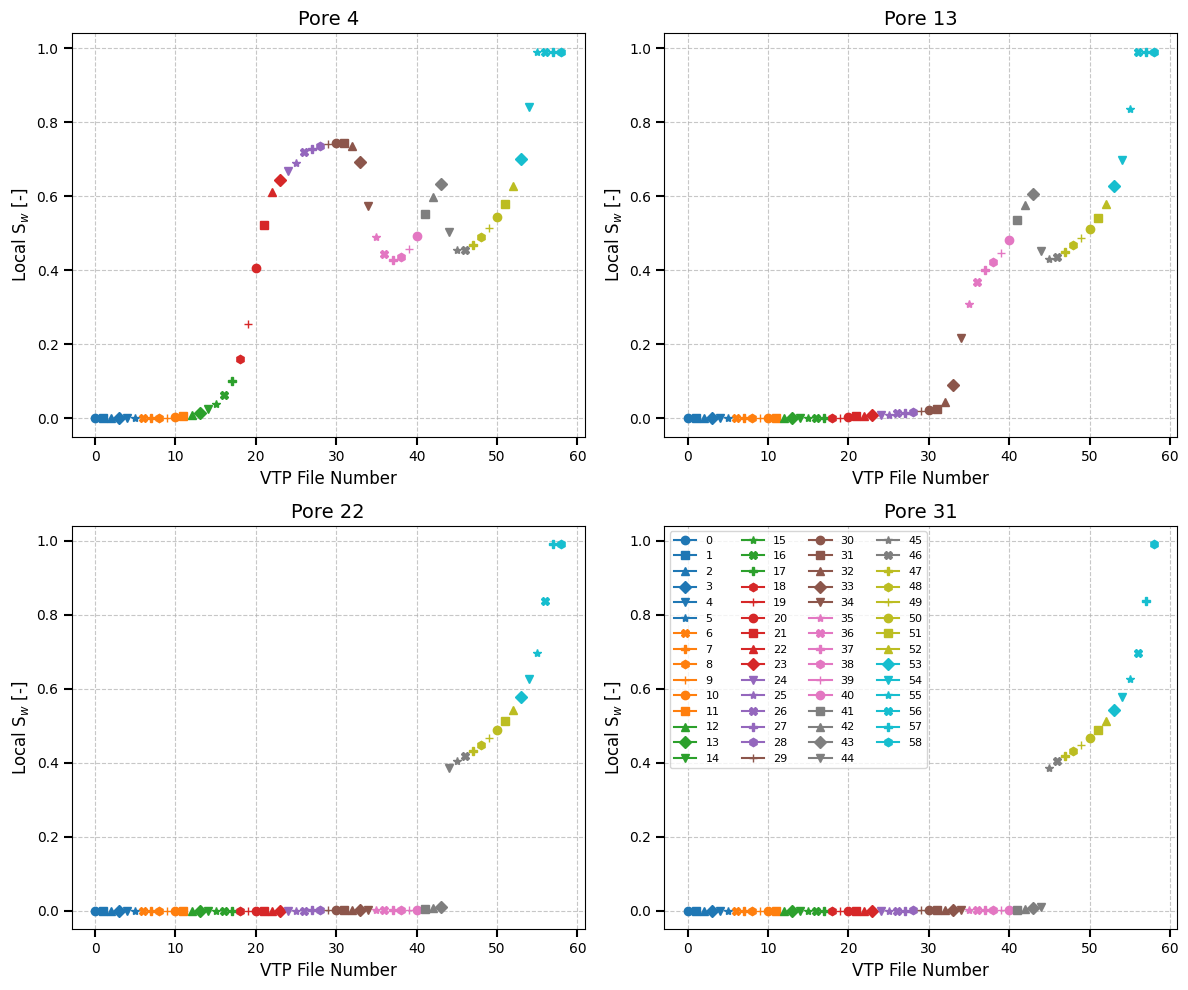

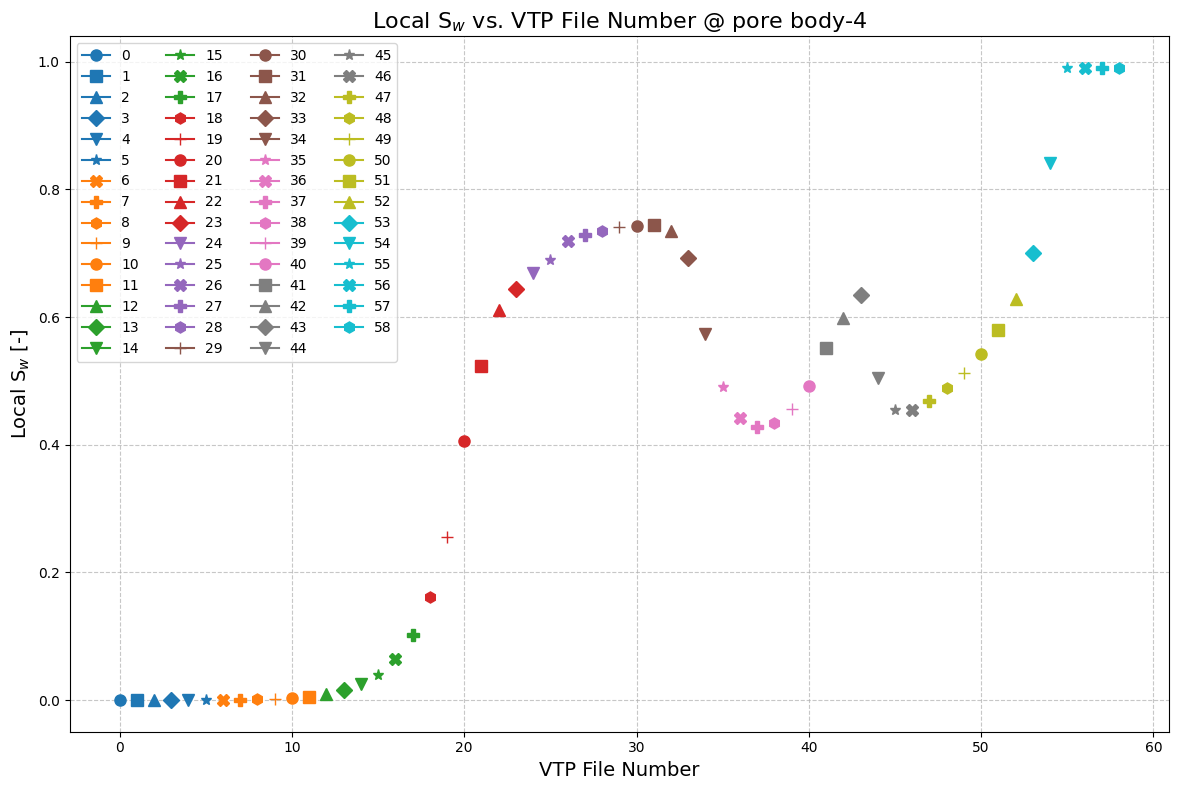

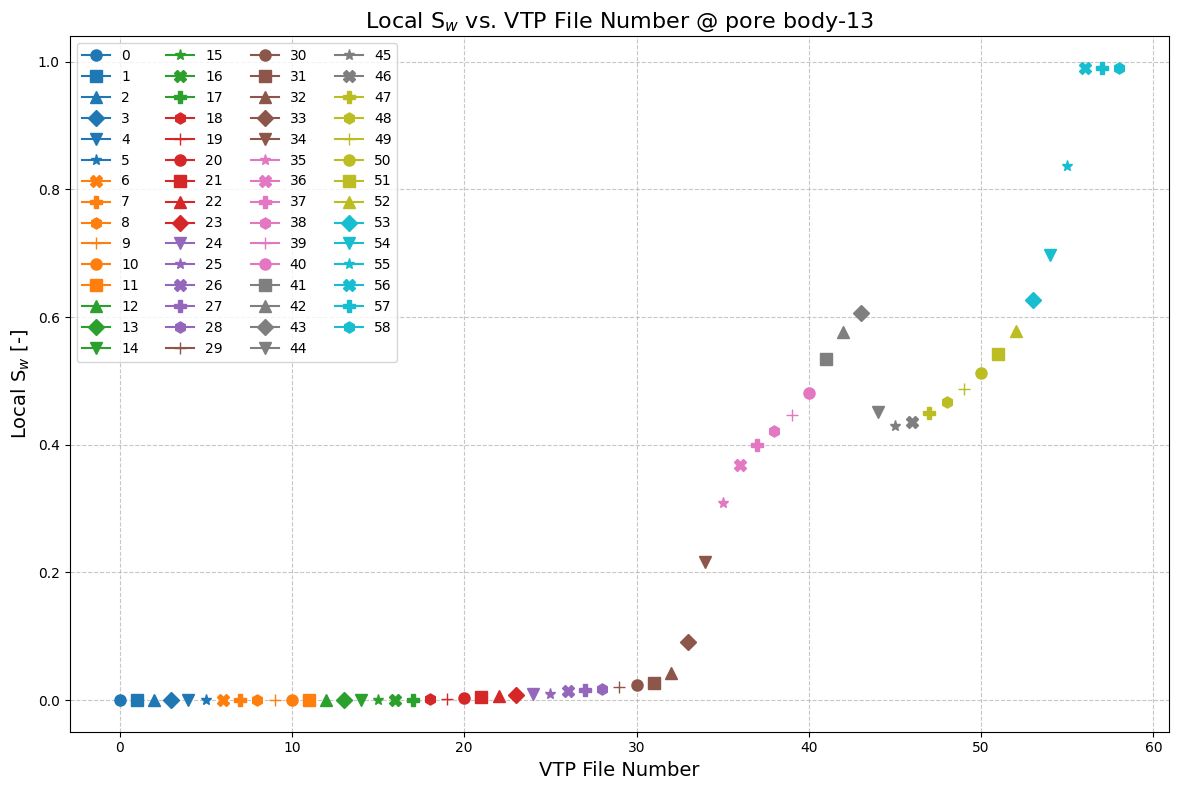

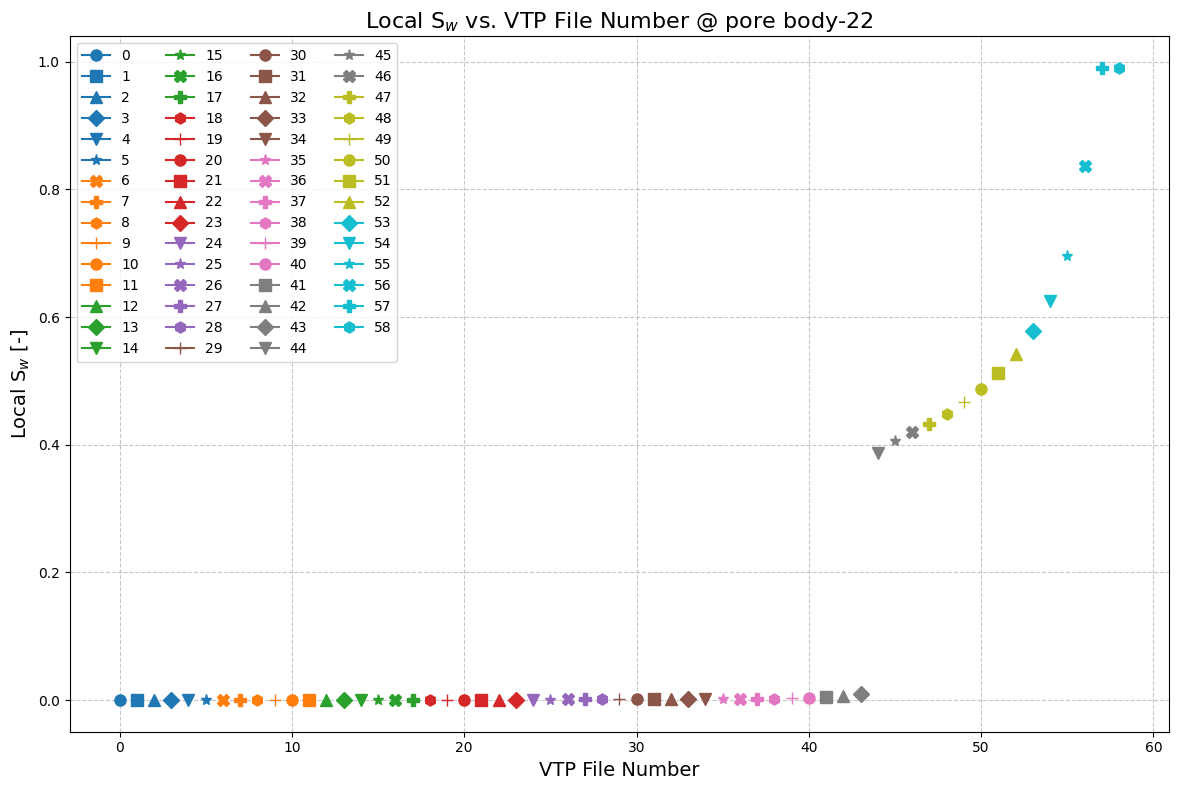

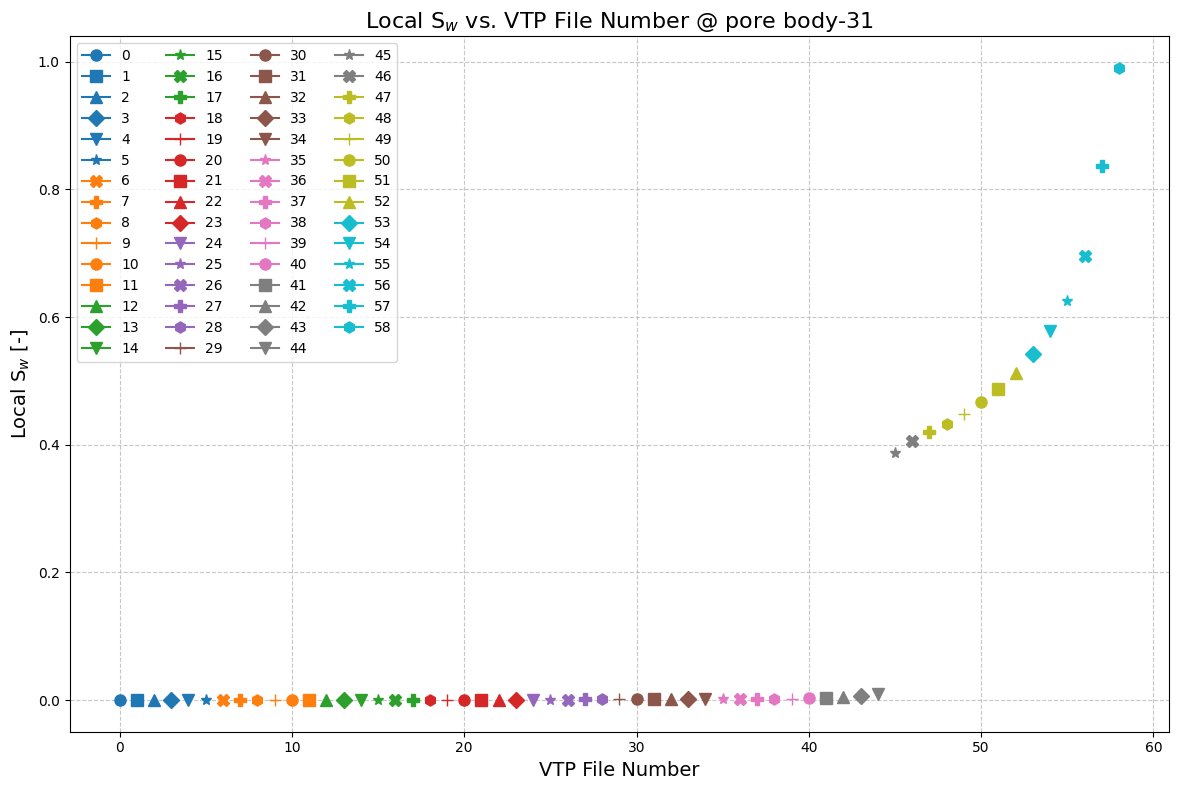

In [144]:
import numpy as np
import vtk
import matplotlib.pyplot as plt
import os

# Specify your file path
file_directory = "/content"

# Function to extract S_liq data from VTP file
def extract_s_liq_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract S_liq (assuming it's stored as point data)
        s_liq_array = np.array(polydata.GetPointData().GetArray("S_liq"))

        return s_liq_array
    except Exception as e:
        print(f"Failed to extract S_liq data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract S_liq data from each VTP file
s_liq_data_arrays = [extract_s_liq_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
s_liq_data_arrays = [s_liq_data for s_liq_data in s_liq_data_arrays if s_liq_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Define markers and colors for each file
markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P', 'h', '+']  # Add more markers if needed
colors = plt.cm.tab10(np.linspace(0, 1, len(s_liq_data_arrays)))

# Pore indices to plot
pore_indices = [4, 13, 22, 31]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot S_liq against file number for each VTP file in subplots
for idx, pore_index in enumerate(pore_indices):
    ax = axs[idx // 2, idx % 2]  # Get subplot axis
    ax.set_xlabel('VTP File Number', fontsize=12)
    ax.set_ylabel('Local S$_w$ [-]', fontsize=12)
    ax.set_title(f'Pore {pore_index}', fontsize=14)  # Use basename to get file name
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    ax.tick_params(axis='both', which='minor', direction='out', length=3, width=1)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    for i, s_liq_array in enumerate(s_liq_data_arrays):
        file_number = i  # VTP file number starts from 0
        marker = markers[i % len(markers)]  # Cycle through markers
        color = colors[i]  # Get color from the predefined list

        ax.plot(file_number, s_liq_array[pore_index], color=color, marker=marker, markersize=6, label=f'{file_number}')

# Add legend to the current subplot
ax.legend(fontsize=8, loc='upper left', ncol = 4)


# Adjust layout
plt.tight_layout()

# Save subplots as .png file with file names
subplots_filename = f"subplots_S_liq_with_legend.png"
plt.savefig(subplots_filename, bbox_inches='tight')
plt.show()

# Save individual plots for each pore index with file names
for pore_index in pore_indices:
    # Plot S_liq against file number for each VTP file
    plt.figure(figsize=(12, 8))

    plt.xlabel('VTP File Number', fontsize=14)
    plt.ylabel('Local S$_w$ [-]', fontsize=14)
    plt.title(f'Local S$_w$ vs. VTP File Number @ pore body-{pore_index}', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    for i, s_liq_array in enumerate(s_liq_data_arrays):
        file_number = i  # VTP file number starts from 0
        marker = markers[i % len(markers)]  # Cycle through markers
        color = colors[i]  # Get color from the predefined list
        plt.plot(file_number, s_liq_array[pore_index], color=color, marker=marker, markersize=8, label=f'{file_number}')

    plt.legend(fontsize=10, loc='upper left', ncol = 4)  # Adjust legend location and font size

    # Save plot as .png file with file names
    plot_filename = f"plot_pore_{pore_index}_S_liq_with_legend.png"
    plt.savefig(plot_filename, bbox_inches='tight')



Number of VTP files detected: 59


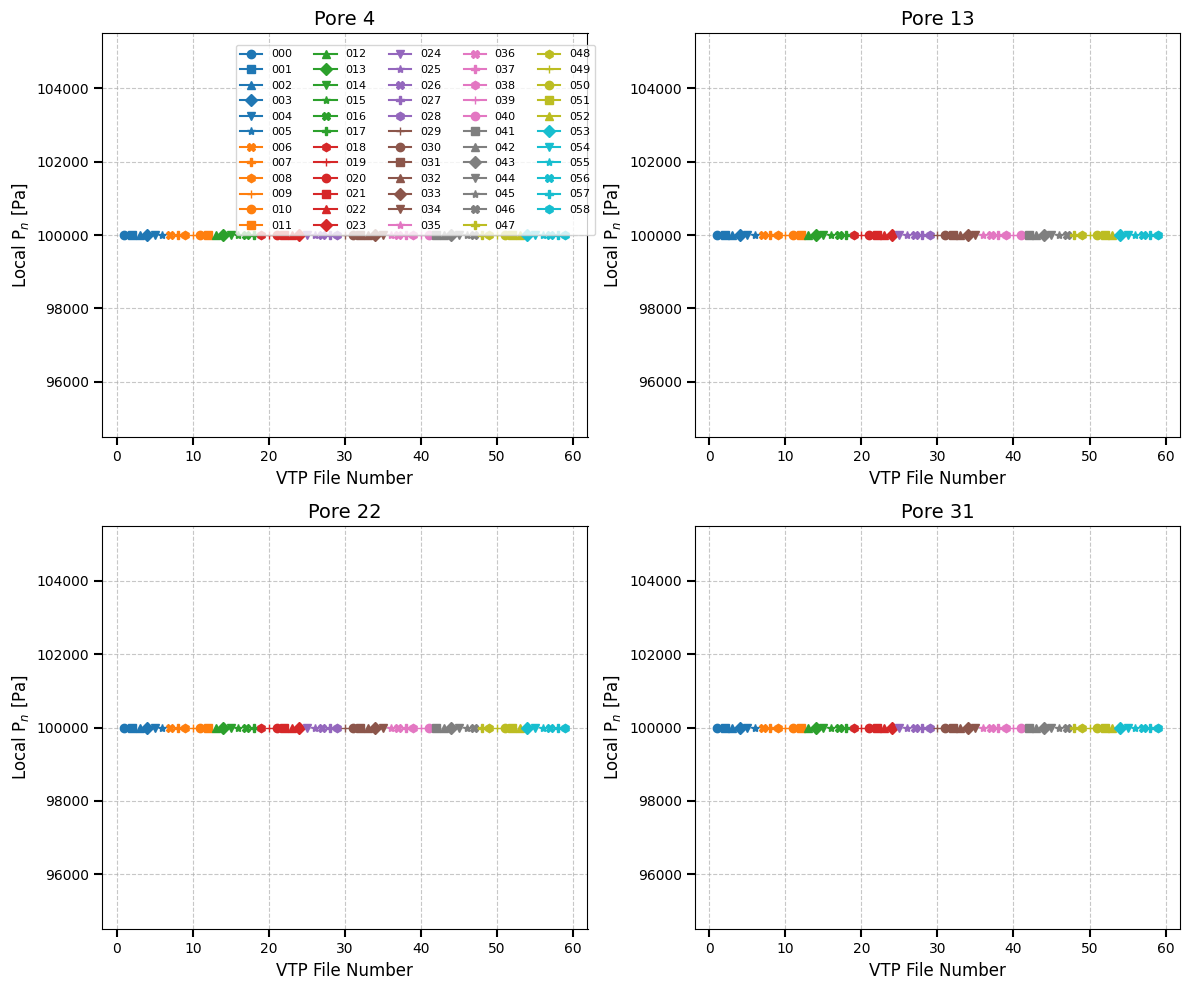

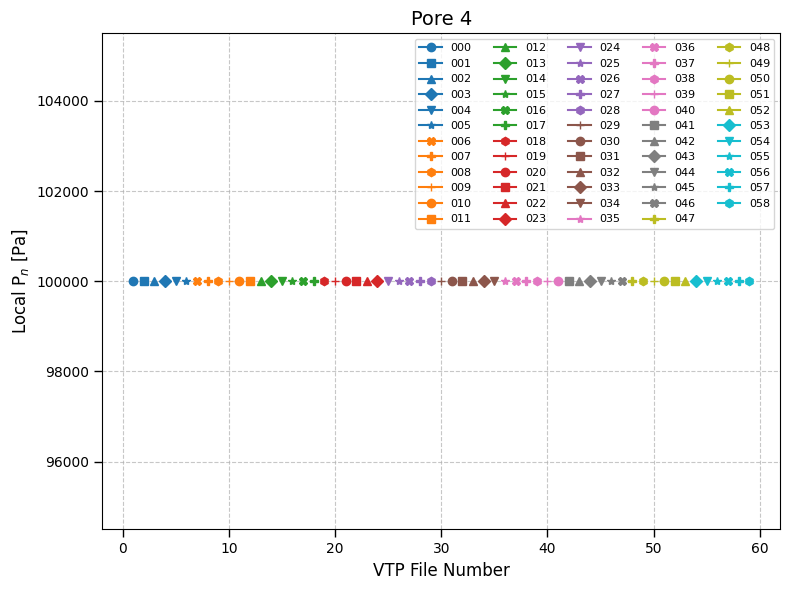

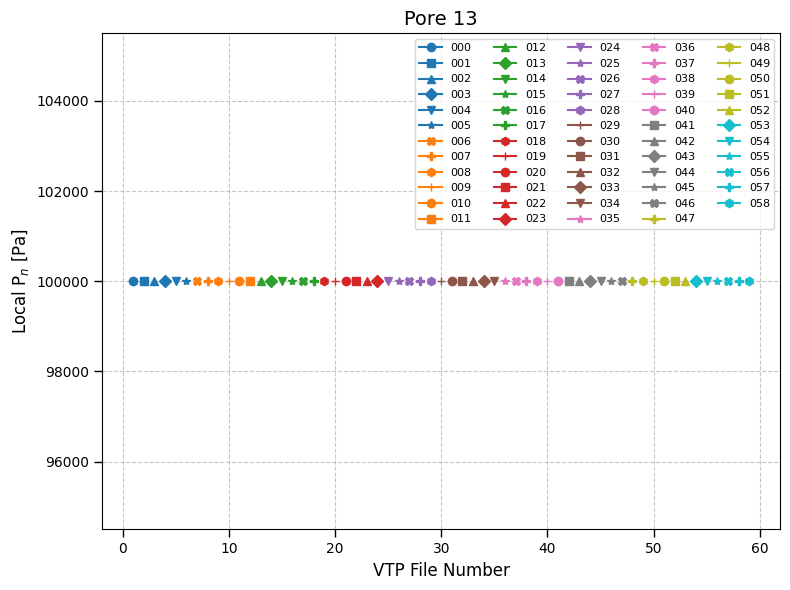

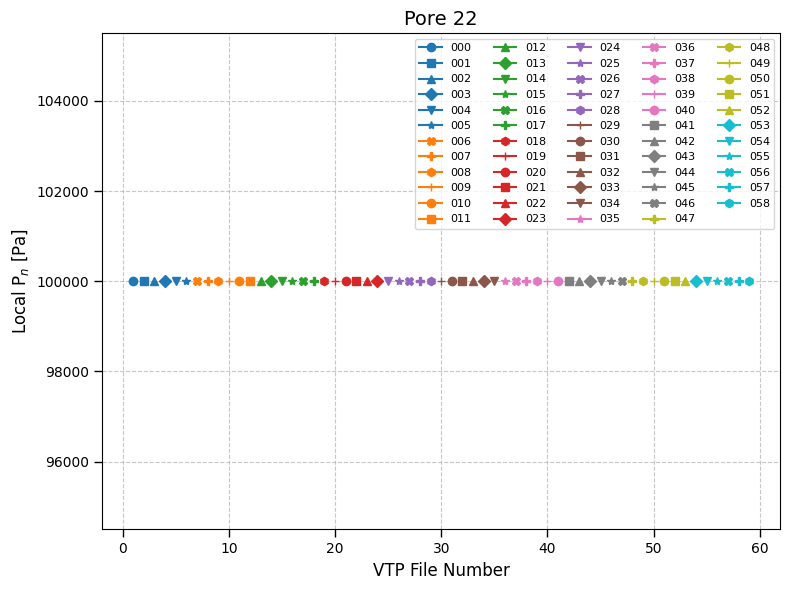

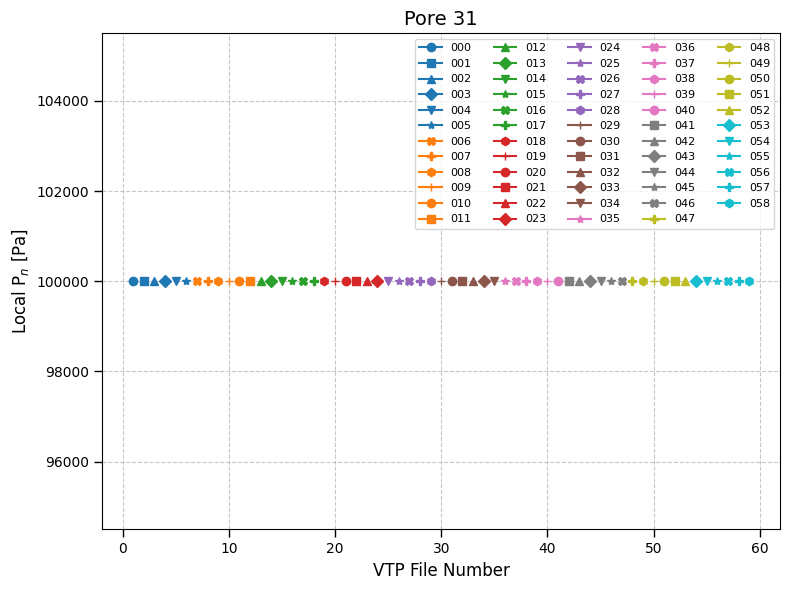

In [145]:
import numpy as np
import vtk
import matplotlib.pyplot as plt
import os

# Specify your file path
file_directory = "/content"

# Function to extract p_gas data from VTP file
def extract_p_gas_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract p_gas (assuming it's stored as point data)
        p_gas_array = np.array(polydata.GetPointData().GetArray("p_gas"))

        return p_gas_array

    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract p_gas data from each VTP file
p_gas_data_arrays = [extract_p_gas_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
p_gas_data_arrays = [p_gas_data for p_gas_data in p_gas_data_arrays if p_gas_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Define markers and colors for each file
markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P', 'h', '+']  # Add more markers if needed
colors = plt.cm.tab10(np.linspace(0, 1, len(p_gas_data_arrays)))

# Pore indices to plot
pore_indices = [4, 13, 22, 31]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot p_gas against file number for each VTP file in subplots
for idx, pore_index in enumerate(pore_indices):
    ax = axs[idx // 2, idx % 2]  # Get subplot axis
    ax.set_xlabel('VTP File Number', fontsize=12)
    ax.set_ylabel('Local P$_n$ [Pa]', fontsize=12)
    ax.set_title(f'Pore {pore_index}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    ax.tick_params(axis='both', which='minor', direction='out', length=3, width=1)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    for i, (p_gas_array) in enumerate(p_gas_data_arrays):
        file_label = os.path.basename(file_paths[i])[-7:-4]
        marker = markers[i % len(markers)]
        color = colors[i]
        ax.plot(i + 1, p_gas_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)

# Add legend to the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=8, loc='upper right', ncol=5, bbox_to_anchor=(0.5, 0.95), borderaxespad=0.)

# Adjust layout
plt.tight_layout()

# Save subplots as .png file with file names
subplots_filename = f"subplots_p_gas_with_legend.png"
plt.savefig(subplots_filename, bbox_inches='tight')

# Save individual plots for each pore index with file names
for pore_index in pore_indices:
    plt.figure(figsize=(8, 6))
    plt.xlabel('VTP File Number', fontsize=12)
    plt.ylabel('Local P$_n$ [Pa]', fontsize=12)
    plt.title(f'Pore {pore_index}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    plt.tick_params(axis='both', which='minor', direction='out', length=3, width=1)

    for i, (p_gas_array) in enumerate(p_gas_data_arrays):
        file_label = os.path.basename(file_paths[i])[-7:-4]
        marker = markers[i % len(markers)]
        color = colors[i]
        plt.plot(i + 1, p_gas_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)

    plt.legend(fontsize=8, loc='upper right', ncol=5)
    plt.tight_layout()

    # Save plot as .png file with file names
    plot_filename = f"plot_pore_{pore_index}_p_gas_with_legend.png"
    plt.savefig(plot_filename, bbox_inches='tight')

plt.show()


In [143]:
import numpy as np
import vtk
import os

# Specify your file path
file_directory = "/content"

# Function to extract p_gas data from VTP file
def extract_p_gas_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract p_gas (assuming it's stored as point data)
        p_gas_array = np.array(polydata.GetPointData().GetArray("p_gas"))

        return p_gas_array

    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract p_gas data from each VTP file
p_gas_data_arrays = [extract_p_gas_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
p_gas_data_arrays = [p_gas_data for p_gas_data in p_gas_data_arrays if p_gas_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Pore indices to check
pore_indices = [4, 13, 22, 31]

# Iterate over each pore index
for pore_index in pore_indices:
    print(f"Pore Index: {pore_index}")

    # Iterate over each file data
    for i, p_gas_array in enumerate(p_gas_data_arrays):
        file_path = file_paths[i]
        file_number = i

        # Check if the p_gas value for the current pore index is less than 100000
        if p_gas_array[pore_index] < 100000:
            print(f"File Path: {file_path}, File Number: {file_number}, Pore Index: {pore_index}, Local p_gas: {p_gas_array[pore_index]}")


Number of VTP files detected: 59
Pore Index: 4
Pore Index: 13
Pore Index: 22
Pore Index: 31


In [111]:
import numpy as np
import vtk
import os

# Specify your file path
file_directory = "/content"

# Function to extract pc data from VTP file
def extract_pc_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract pc (assuming it's stored as point data)
        pc_array = np.array(polydata.GetPointData().GetArray("pc"))

        # Extract pcSnapoff data as cell data
        pc_snapoff_data = polydata.GetCellData().GetArray("pcSnapoff")
        if pc_snapoff_data is None:
            raise ValueError("pcSnapoff data not found in the VTP file.")

        # Extract pcEntry data as cell data
        pc_Entry_data = polydata.GetCellData().GetArray("pcEntry")
        if pc_Entry_data is None:
            raise ValueError("pcEntry data not found in the VTP file.")

        # Extract pcSnapoff value (taking only the first value)
        pc_snapoff_value = pc_snapoff_data.GetValue(0)

        # Extract pcEntry value (taking only the first value)
        pc_Entry_value = pc_Entry_data.GetValue(0)

        return pc_array, pc_snapoff_value, pc_Entry_value

    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract pc data from each VTP file
pc_data_arrays = [extract_pc_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
pc_data_arrays = [pc_data for pc_data in pc_data_arrays if pc_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Pore indices to check
pore_indices = [4, 13, 22, 31]

# Iterate over each pore index
for pore_index in pore_indices:
    print(f"Pore Index: {pore_index}")

    # Iterate over each file data
    for i, (pc_array, pc_snapoff_value, pc_Entry_value) in enumerate(pc_data_arrays):
        file_path = file_paths[i]
        file_number = i

        # Check if the pc value for the current pore index satisfies the conditions
        if pc_snapoff_value-14 < pc_array[pore_index] < pc_snapoff_value+14:
            print(f"File Path: {file_path}, File Number: {file_number}, Pore Index: {pore_index}, Local P_c: {pc_array[pore_index]}")



Number of VTP files detected: 59
Pore Index: 4
File Path: /content/2p_im_magic_use_het-00025.vtp, File Number: 25, Pore Index: 4, Local P_c: 1463.2099609375
File Path: /content/2p_im_magic_use_het-00026.vtp, File Number: 26, Pore Index: 4, Local P_c: 1460.780029296875
File Path: /content/2p_im_magic_use_het-00027.vtp, File Number: 27, Pore Index: 4, Local P_c: 1460.0799560546875
File Path: /content/2p_im_magic_use_het-00028.vtp, File Number: 28, Pore Index: 4, Local P_c: 1459.5999755859375
File Path: /content/2p_im_magic_use_het-00029.vtp, File Number: 29, Pore Index: 4, Local P_c: 1459.2900390625
File Path: /content/2p_im_magic_use_het-00030.vtp, File Number: 30, Pore Index: 4, Local P_c: 1459.0999755859375
File Path: /content/2p_im_magic_use_het-00031.vtp, File Number: 31, Pore Index: 4, Local P_c: 1459.010009765625
File Path: /content/2p_im_magic_use_het-00032.vtp, File Number: 32, Pore Index: 4, Local P_c: 1459.6099853515625
File Path: /content/2p_im_magic_use_het-00033.vtp, File N

Number of VTP files detected: 59


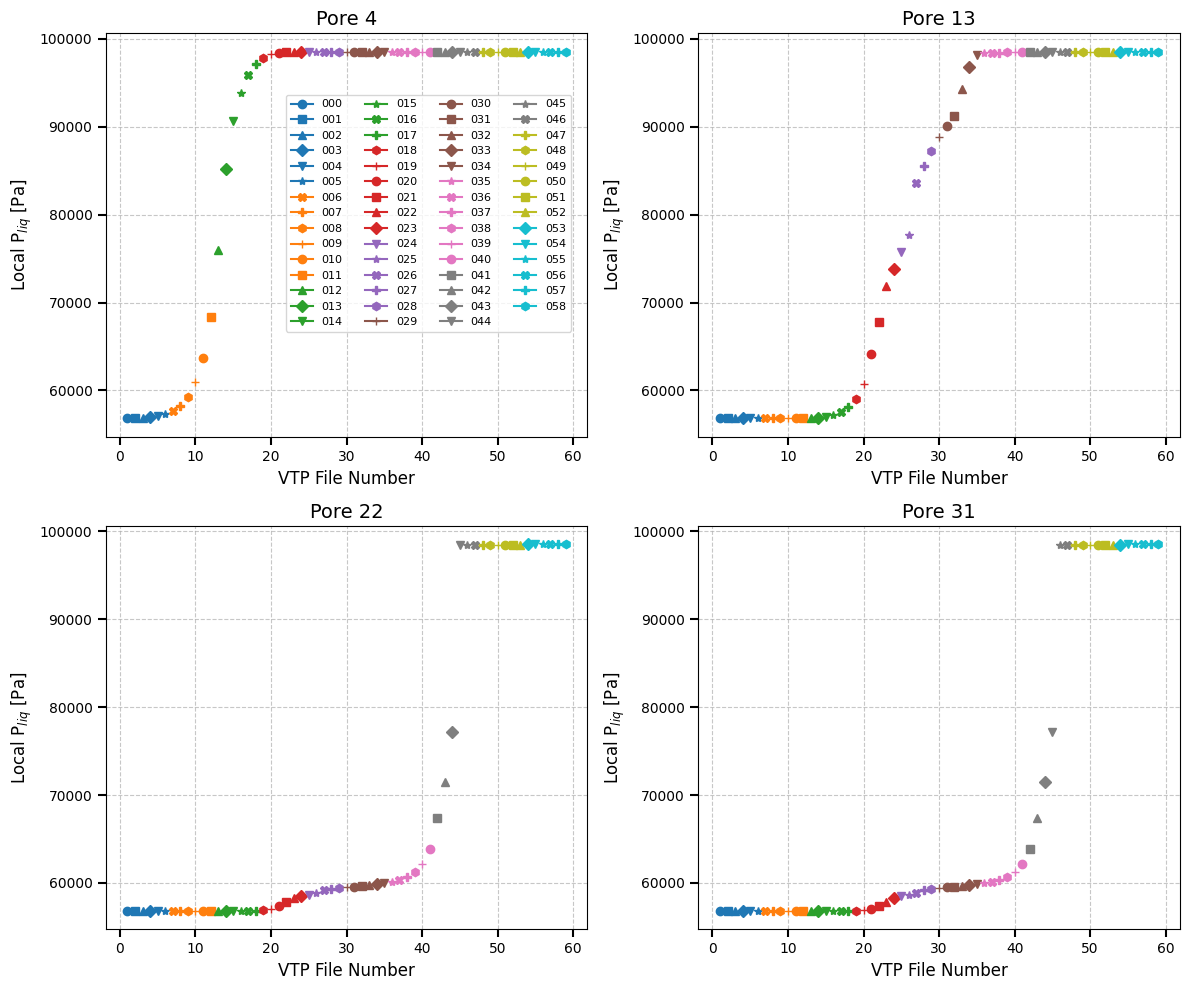

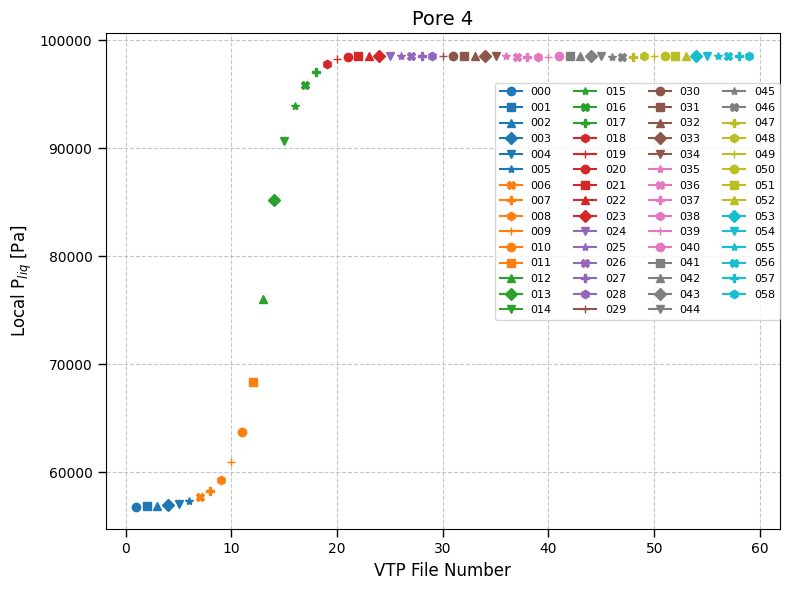

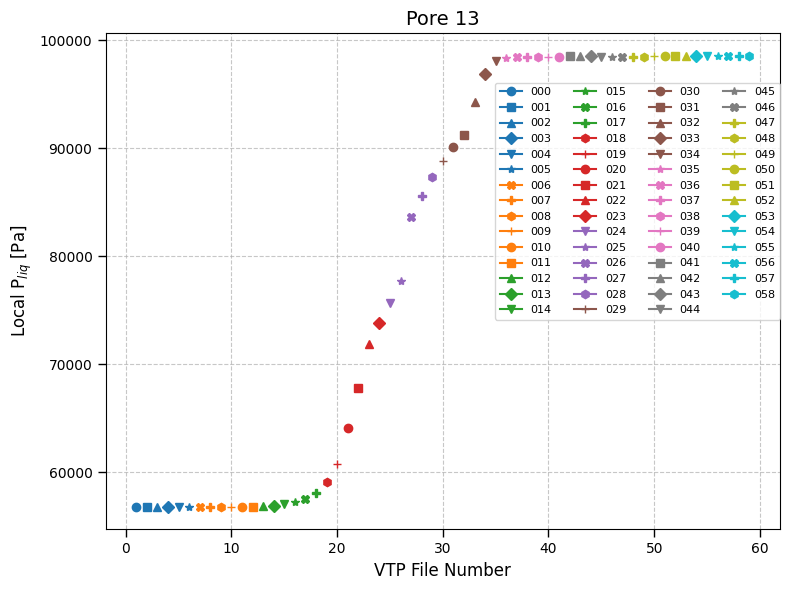

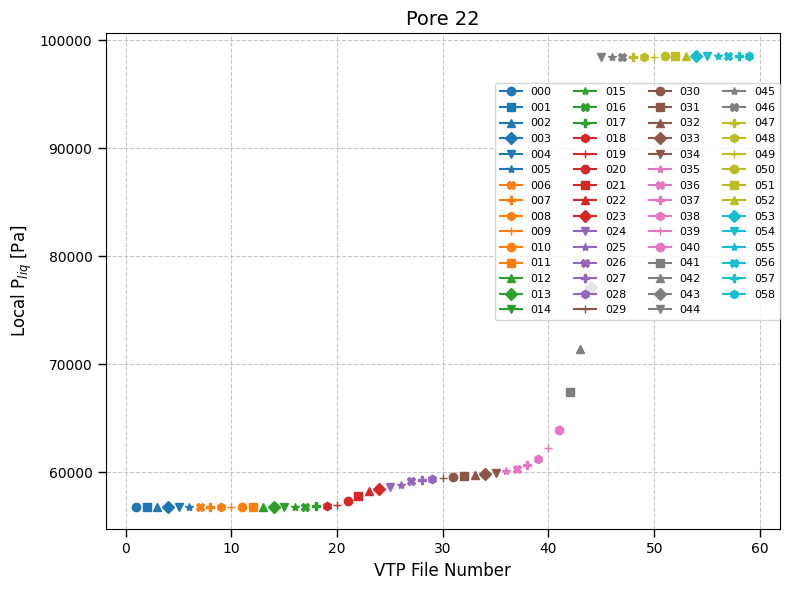

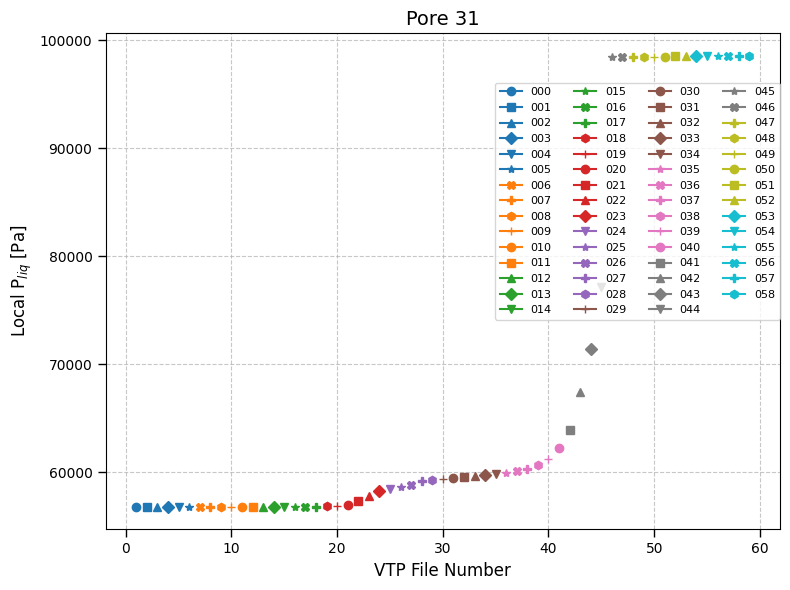

In [132]:
import numpy as np
import vtk
import matplotlib.pyplot as plt
import os

# Specify your file path
file_directory = "/content"

# Function to extract p_liq data from VTP file
def extract_p_liq_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract p_liq (assuming it's stored as point data)
        p_liq_array = np.array(polydata.GetPointData().GetArray("p_liq"))

        return p_liq_array

    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract p_liq data from each VTP file
p_liq_data_arrays = [extract_p_liq_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
p_liq_data_arrays = [p_liq_data for p_liq_data in p_liq_data_arrays if p_liq_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Define markers and colors for each file
markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P', 'h', '+']  # Add more markers if needed
colors = plt.cm.tab10(np.linspace(0, 1, len(p_liq_data_arrays)))

# Pore indices to plot
pore_indices = [4, 13, 22, 31]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot p_liq against file number for each VTP file in subplots
for idx, pore_index in enumerate(pore_indices):
    ax = axs[idx // 2, idx % 2]  # Get subplot axis
    ax.set_xlabel('VTP File Number', fontsize=12)
    ax.set_ylabel('Local P$_{{liq}}$ [Pa]', fontsize=12)
    ax.set_title(f'Pore {pore_index}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    ax.tick_params(axis='both', which='minor', direction='out', length=3, width=1)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    for i, (p_liq_array) in enumerate(p_liq_data_arrays):
        file_label = os.path.basename(file_paths[i])[-7:-4]
        marker = markers[i % len(markers)]
        color = colors[i]
        ax.plot(i + 1, p_liq_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)

# Add legend to the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=8, loc='upper right', ncol=4, bbox_to_anchor=(0.48, 0.9), borderaxespad=0.)

# Adjust layout
plt.tight_layout()

# Save subplots as .png file with file names
subplots_filename = f"subplots_p_liq_with_legend.png"
plt.savefig(subplots_filename, bbox_inches='tight')

# Save individual plots for each pore index with file names
for pore_index in pore_indices:
    plt.figure(figsize=(8, 6))
    plt.xlabel('VTP File Number', fontsize=12)
    plt.ylabel('Local P$_{{liq}}$ [Pa]', fontsize=12)
    plt.title(f'Pore {pore_index}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    plt.tick_params(axis='both', which='minor', direction='out', length=3, width=1)

    for i, (p_liq_array) in enumerate(p_liq_data_arrays):
        file_label = os.path.basename(file_paths[i])[-7:-4]
        marker = markers[i % len(markers)]
        color = colors[i]
        plt.plot(i + 1, p_liq_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)

    plt.legend(fontsize=8, loc='upper right', ncol=4, bbox_to_anchor=(1, 0.9), borderaxespad=0.)
    plt.tight_layout()

    # Save plot as .png file with file names
    plot_filename = f"plot_pore_{pore_index}_p_liq_with_legend.png"
    plt.savefig(plot_filename, bbox_inches='tight')

plt.show()


Number of VTP files detected: 59


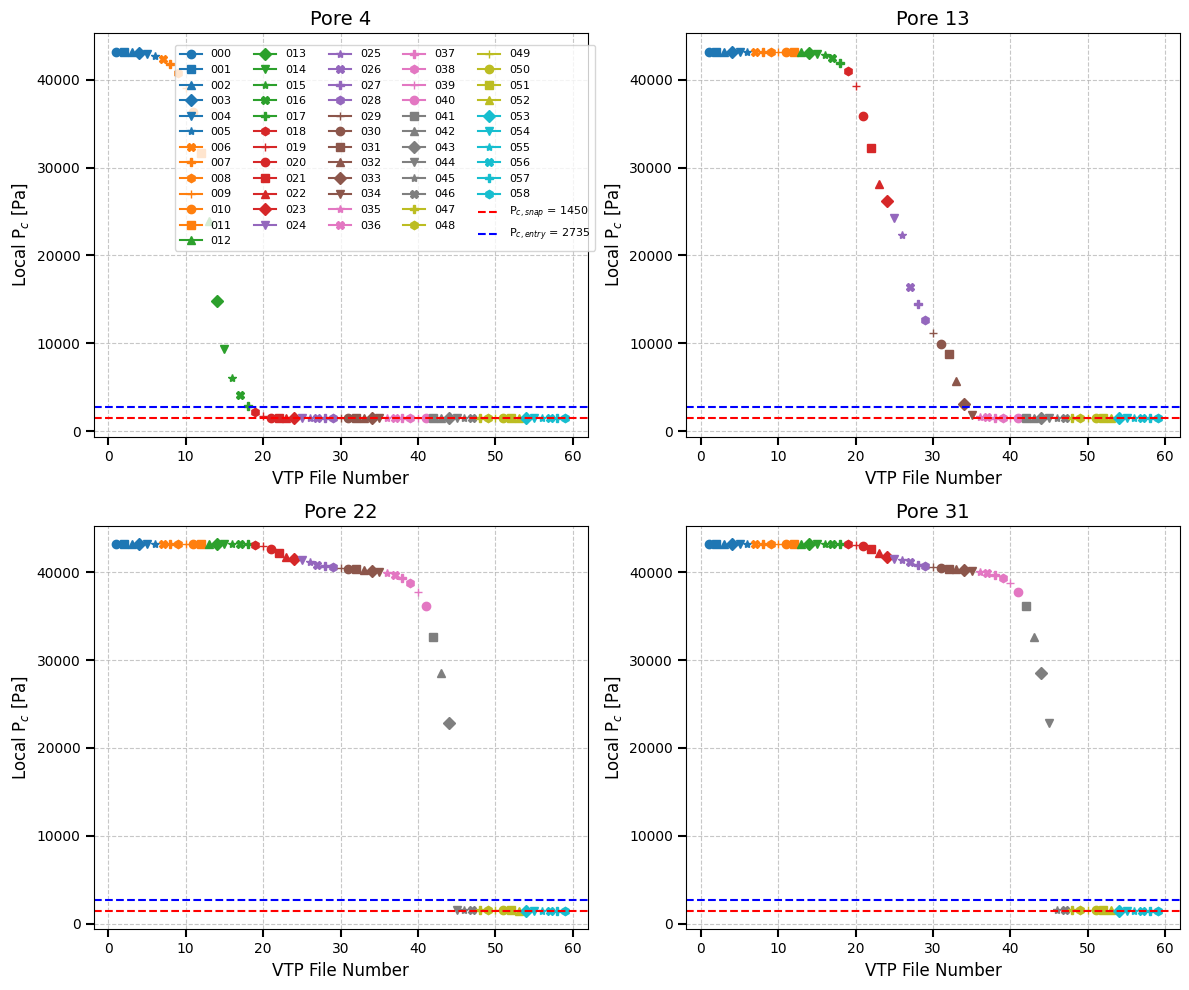

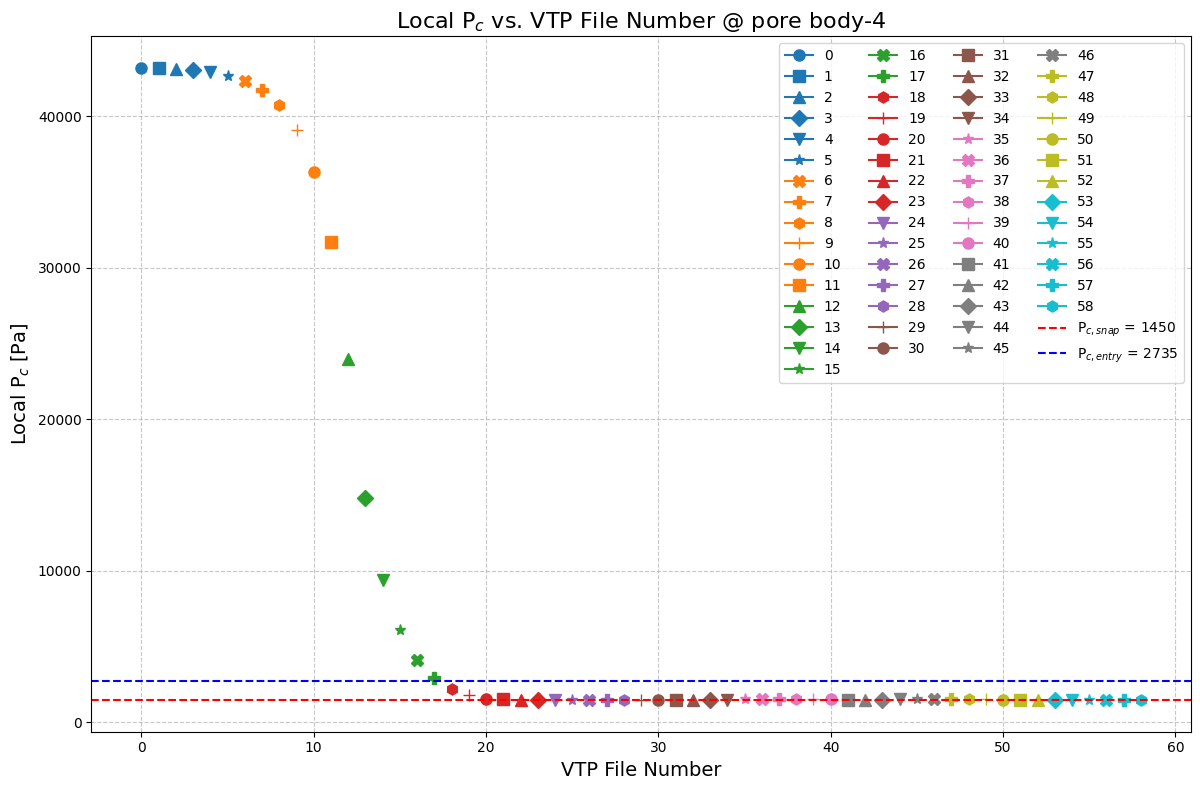

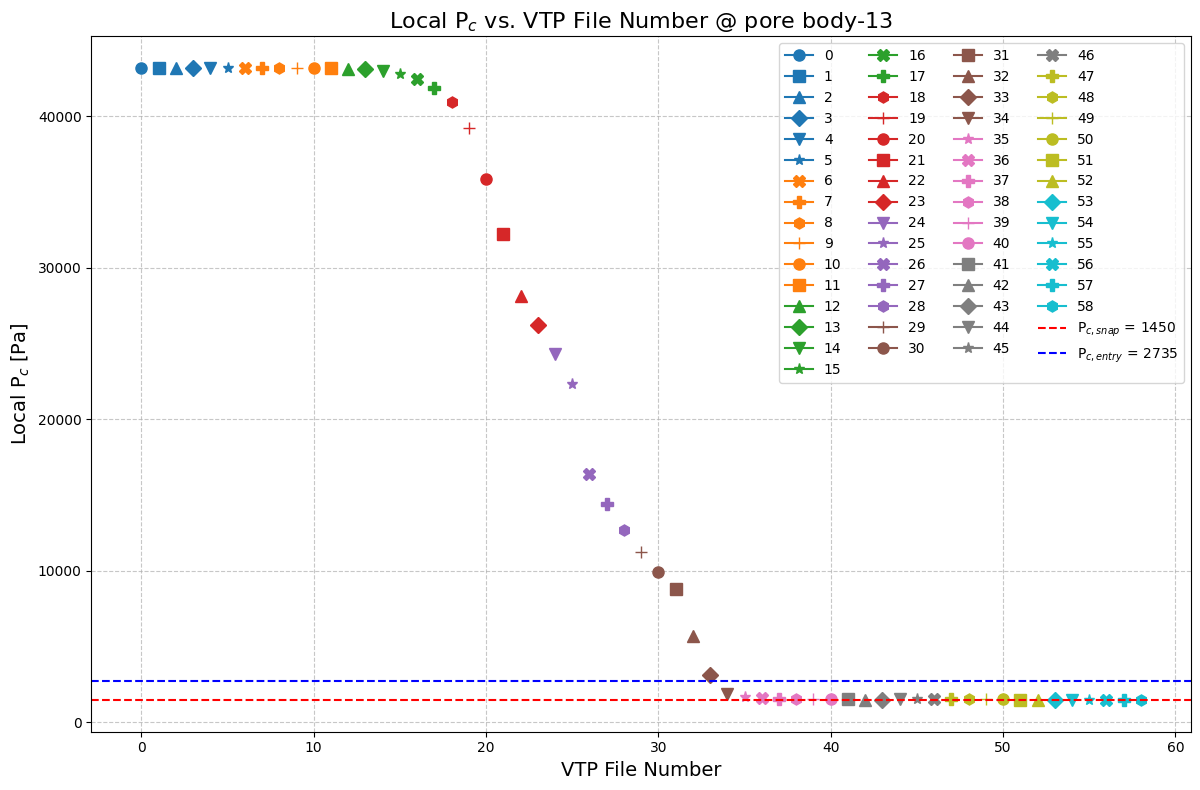

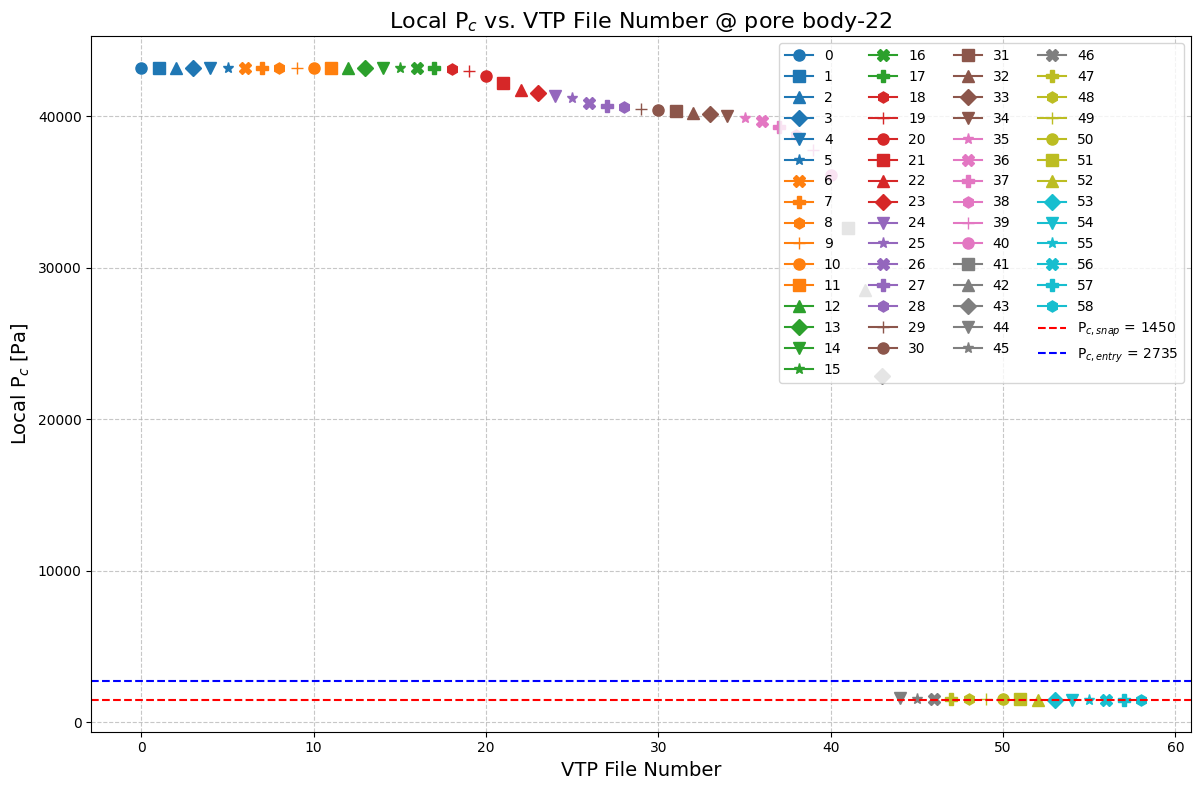

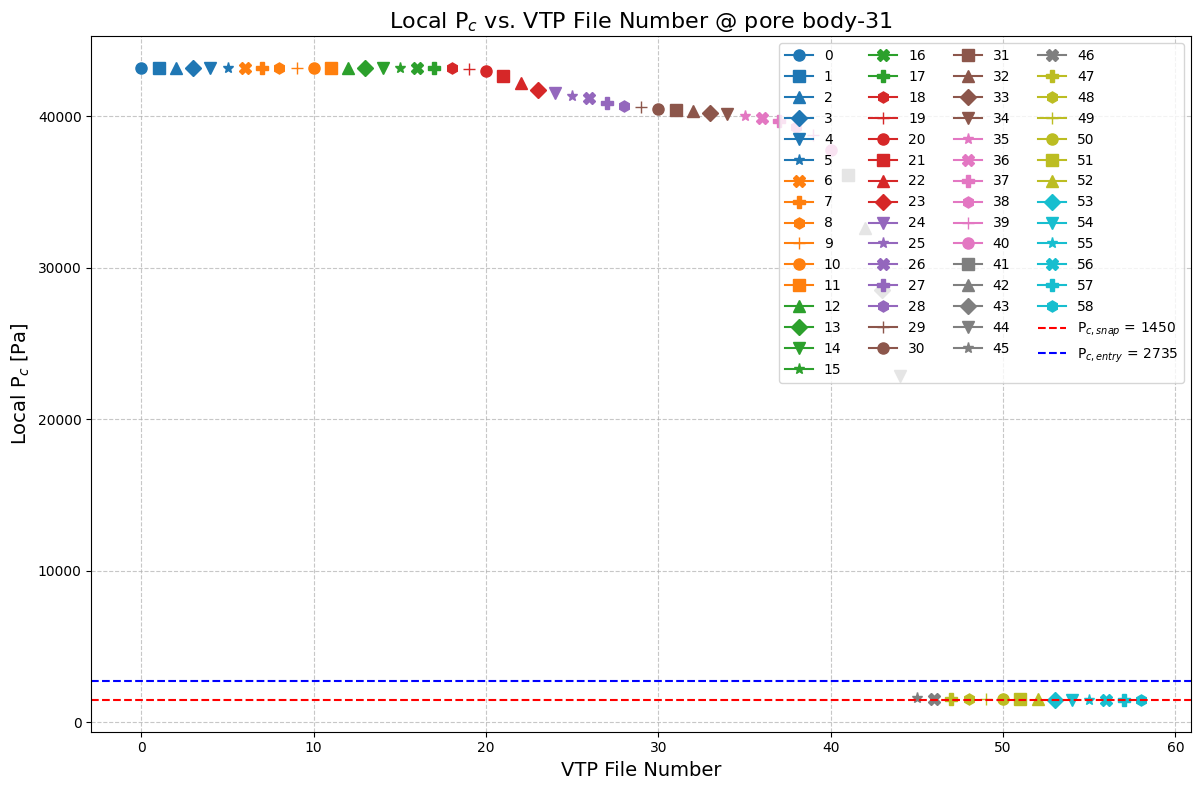

In [148]:
import vtk
import matplotlib.pyplot as plt
import os

# Specify your file path
file_directory = "/content"

# Function to extract pc data from VTP file
def extract_pc_from_vtp(file_path):
    try:
        reader = vtk.vtkXMLPolyDataReader()
        reader.SetFileName(file_path)
        reader.Update()

        polydata = reader.GetOutput()

        # Extract pc (assuming it's stored as point data)
        pc_array = np.array(polydata.GetPointData().GetArray("pc"))

        # Extract pcSnapoff data as cell data
        pc_snapoff_data = polydata.GetCellData().GetArray("pcSnapoff")
        if pc_snapoff_data is None:
            raise ValueError("pcSnapoff data not found in the VTP file.")

        # Extract pcEntry data as cell data
        pc_Entry_data = polydata.GetCellData().GetArray("pcEntry")
        if pc_Entry_data is None:
            raise ValueError("pcEntry data not found in the VTP file.")

        # Extract pcSnapoff value (taking only the first value)
        pc_snapoff_value = pc_snapoff_data.GetValue(0)

        # Extract pcEntry value (taking only the first value)
        pc_Entry_value = pc_Entry_data.GetValue(0)

        return pc_array, pc_snapoff_value, pc_Entry_value

    except Exception as e:
        print(f"Failed to extract data from {file_path}: {e}")

# Function to count the number of VTP files in the specified directory
def count_vtp_files(directory):
    vtp_files = [file for file in os.listdir(directory) if file.endswith(".vtp")]
    return len(vtp_files)

# Determine the number of VTP files
num_vtp_files = count_vtp_files(file_directory)

# Generate file paths dynamically
file_paths = [os.path.join(file_directory, f"2p_im_magic_use_het-{i:05d}.vtp") for i in range(num_vtp_files)]

# Extract pc data from each VTP file
pc_data_arrays = [extract_pc_from_vtp(file_path) for file_path in file_paths]

# Filter out None values (failed extractions)
pc_data_arrays = [pc_data for pc_data in pc_data_arrays if pc_data is not None]

# Print the number of VTP files detected
print(f"Number of VTP files detected: {num_vtp_files}")

# Define markers and colors for each file
markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P', 'h', '+']  # Add more markers if needed
colors = plt.cm.tab10(np.linspace(0, 1, len(pc_data_arrays)))

# Pore indices to plot
pore_indices = [4, 13, 22, 31]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot pc against file number for each VTP file in subplots
for idx, pore_index in enumerate(pore_indices):
    ax = axs[idx // 2, idx % 2]  # Get subplot axis
    ax.set_xlabel('VTP File Number', fontsize=12)
    ax.set_ylabel('Local P$_c$ [Pa]', fontsize=12)
    ax.set_title(f'Pore {pore_index}', fontsize=14)  # Use basename to get file name
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=10)
    ax.tick_params(axis='both', which='minor', direction='out', length=3, width=1)
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    pc_snapoff_values = []  # Store pcSnapoff values for each file
    pc_Entry_values = []  # Store pcEntry values for each file
    for i, file_path in enumerate(file_paths):
        pc_array, pc_snapoff_value, pc_Entry_value = extract_pc_from_vtp(file_path)
        if pc_array is not None:
            file_label = os.path.basename(file_path)[-7:-4]
            marker = markers[i % len(markers)]
            color = colors[i]

            ax.plot(i + 1, pc_array[pore_index], color=color, marker=marker, markersize=6, label=file_label)
            pc_snapoff_values.append(pc_snapoff_value)  # Collect pcSnapoff values
            pc_Entry_values.append(pc_Entry_value)  # Collect pcEntry values

    # Add pcSnapoff value to the legend (only once)
    unique_pc_snapoff = list(set(pc_snapoff_values))
    ax.axhline(y=int(unique_pc_snapoff[0]), color='r', linestyle='--', label=f'P$_{{c,snap}}$ = {int(unique_pc_snapoff[0])}')

    # Add pcEntry value to the legend (only once)
    unique_pc_Entry = list(set(pc_Entry_values))
    ax.axhline(y=int(unique_pc_Entry[0]), color='b', linestyle='--', label=f'P$_{{c,entry}}$ = {int(unique_pc_Entry[0])}')

# Add legend to the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=8, loc='upper right', ncol=5, bbox_to_anchor=(0.5, 0.95), borderaxespad=0.)

# Adjust layout
plt.tight_layout()

# Save subplots as .png file with file names
subplots_filename = f"subplots_pc_with_legend.png"
plt.savefig(subplots_filename, bbox_inches='tight')
plt.show()

# Save individual plots for each pore index with file names
for pore_index in pore_indices:
    # Plot pc against file number for each VTP file
    plt.figure(figsize=(12, 8))

    plt.xlabel('VTP File Number', fontsize=14)
    plt.ylabel('Local P$_c$ [Pa]', fontsize=14)
    plt.title(f'Local P$_c$ vs. VTP File Number @ pore body-{pore_index}', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    pc_snapoff_values = []  # Store pcSnapoff values for each file
    pc_Entry_values = []  # Store pcEntry values for each file
    for i, (pc_array, pc_snapoff_value, pc_Entry_value) in enumerate(pc_data_arrays):
        file_number = i  # Adjust file number to start from 0
        marker = markers[i % len(markers)]  # Cycle through markers
        color = colors[i]  # Get color from the predefined list
        plt.plot(file_number, pc_array[pore_index], color=color, marker=marker, markersize=8, label=f'{file_number}')
        pc_snapoff_values.append(pc_snapoff_value)  # Collect pcSnapoff values
        pc_Entry_values.append(pc_Entry_value)  # Collect pcEntry values

    # Add pcSnapoff value to the legend (only once)
    unique_pc_snapoff = list(set(pc_snapoff_values))
    plt.axhline(y=int(unique_pc_snapoff[0]), color='r', linestyle='--', label=f'P$_{{c,snap}}$ = {int(unique_pc_snapoff[0])}')

    # Add pcEntry value to the legend (only if it exists)
    if pc_Entry_values:
        unique_pc_Entry = list(set(pc_Entry_values))
        plt.axhline(y=int(unique_pc_Entry[0]), color='b', linestyle='--', label=f'P$_{{c,entry}}$ = {int(unique_pc_Entry[0])}')

    plt.legend(fontsize=10, loc='upper right', ncol=4)  # Adjust legend location and font size

    # Save plot as .png file with file names
    plot_filename = f"plot_pore_{pore_index}_pc_with_legend.png"
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.show()
